In [50]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [51]:
# Створемо клас для фільтрів
class ImageFilters:
    def __init__(self, image_path):
        self.image = cv2.imread(image_path) # Зчитування зображення з диску

    # Функція для відображення зображення    
    def show_image(self, image, title):
        plt.imshow(image, cmap='gray')
        plt.title(title)
        plt.axis('off')
        plt.show()

    # Фільтр Собеля   
    def sobel_filter(self):
        
        # перетворемо зображення на відтінки сірого
        gray = cv2.cvtColor(self.image, cv2.COLOR_BGR2GRAY)
        
        # обчислюємо градієнти по осях x та y відповідно
        sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
        
        # обчислюємо величину та орієнтацію градієнта
        sobel_result = np.sqrt(sobel_x**2 + sobel_y**2)
        sobel_result *= 255.0 / sobel_result.max()
        return sobel_result
        
    # Фільтр Кенні
    def canny_filter(self):
        canny_result = cv2.Canny(self.image, 50, 150)
        return canny_result
                      
    # Фільтр Робертса
    def roberts_filter(self):
        roberts_kernel_x = np.array([[1, 0], [0, -1]], dtype=np.float32)
        roberts_kernel_y = np.array([[0, 1], [-1, 0]], dtype=np.float32)
        roberts_x = cv2.filter2D(self.image, -1, roberts_kernel_x)
        roberts_y = cv2.filter2D(self.image, -1, roberts_kernel_y)
        roberts_result = cv2.addWeighted(roberts_x, 0.5, roberts_y, 0.5, 0)
        return roberts_result
         
    # Порівняння фільтрів
    def run(self):
        if self is None:
            print("Зображення не знайдено!")
            return
        
        sobel_result = self.sobel_filter()
        canny_result = self.canny_filter()
        roberts_result = self.roberts_filter()
        
        # Порівняння результатів
        plt.figure(figsize=(12, 8))
        plt.subplot(1, 3, 1)
        plt.imshow(sobel_result, cmap='gray')
        plt.title('Фільтр Собеля')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(canny_result, cmap='gray')
        plt.title('Фільтр Кенні')
        plt.axis('off')

        plt.subplot(1, 3, 3)
        plt.imshow(roberts_result, cmap='gray')
        plt.title('Фільтр Робертса')
        plt.axis('off')

        plt.tight_layout()
        plt.show()  

Введіть шлях до зображення: C:\Users\Asus\PycharmProjects\60\1.jpg


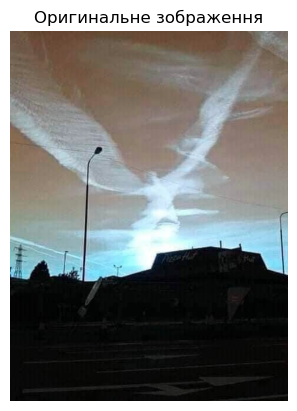

In [52]:
# Завантажемо зображення та виведемо його
image_path = input("Введіть шлях до зображення: ")
image_filters = ImageFilters(image_path)

image_filters.show_image(image_filters.image, 'Оригинальне зображення')

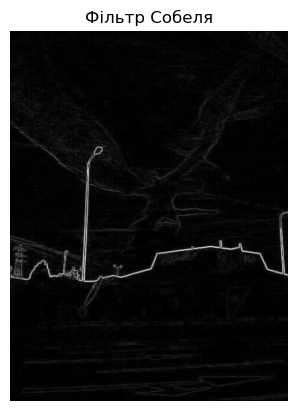

In [53]:
# Застосування фільтра Собеля та показ результату
sobel_result = ImageFilters(image_path)
sobel_result.show_image(sobel_result.sobel_filter(), 'Фільтр Собеля')

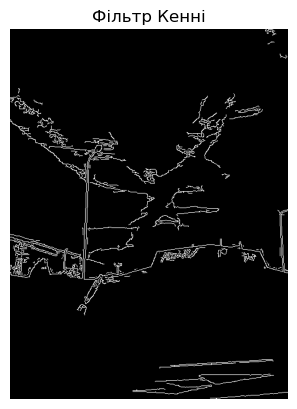

In [54]:
# Застосування фільтра Кенні та показ результату
canny_result = ImageFilters(image_path)
canny_result.show_image(canny_result.canny_filter(), 'Фільтр Кенні')

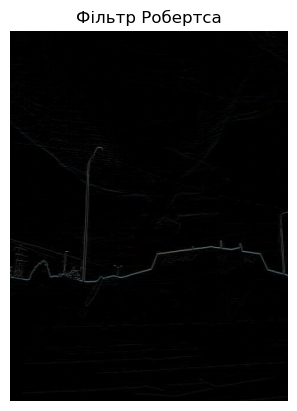

In [55]:
# Застосування фільтра Робертса та показ результату
roberts_result = ImageFilters(image_path)
roberts_result.show_image(roberts_result.roberts_filter(), 'Фільтр Робертса')


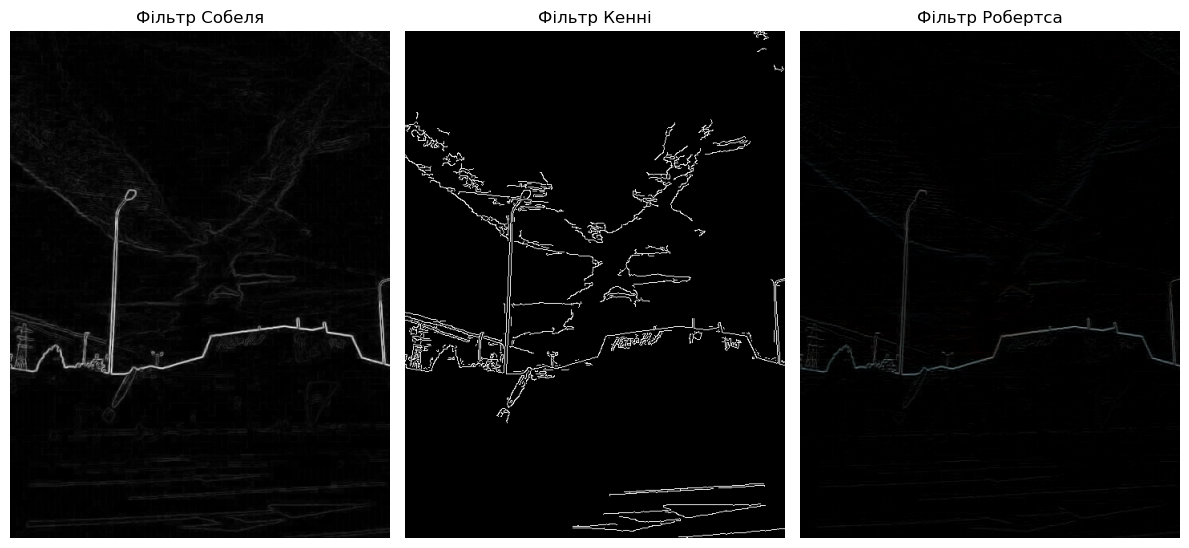

In [56]:
# Порівняння результатів фільтрів
image_filters.run()

In [57]:
# Бачимо що фільтр Собеля дозоляє виявити більш чіткі границі але не дуже стійкий до шуму.
# Фільтр Кенні виділяє границі тонкими лініями та дає високу точність, детальність.
# Фільтр Робертса дає гарний результат для об'єктів з чіткими границями.